In [2]:
import math
import random
import time
from numpy import conj
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

np.seterr(divide='ignore', invalid='ignore')
eps=1.0e-5
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier
def P(x):
    return c0+c1*x+c2*x**2+c3*x**3+c4*x**4+c5*x**5

def LensSolve(rs_x,rs_y,m1,m2,dis):
    def P(x):
        return c0+c1*x+c2*x**2+c3*x**3+c4*x**4+c5*x**5

    def dp(x):
        return c1+2*c2*x+3*c3*x**2+4*c4*x**3+5*c5*x**4    
    z1=0.5*dis + 0.0j ### the lenses are located symetric over the x-axis
    rs=complex(rs_x,rs_y) ### position of teh source star
    rs_c=conj(rs)

#    m1=1.0/(1.0+q)
#    m2=q/(1.0+q)
    m=(m1+m2)/2.0
    dm=(m1-m2)/2.0
    z2=z1*z1  
    z3=z1*z1*z1  
    z4=z1*z1*z1*z1  
    z5=z1*z1*z1*z1*z1
    z6=z1*z1*z1*z1*z1*z1

    c0=  z2*(4.0*dm*dm*rs + 4.0*m*dm*z1 + 4.0*dm*rs*rs_c*z1 + 2.0*m*rs_c*z2 + rs*rs_c*rs_c*z2 - 2.0*dm*z3 - rs*z4) 
    c1= -8.0*m*dm*rs*z1 - 4.0*dm*dm*z2 -4.0*m*m*z2 -4.0*m*rs*rs_c*z2 -4.0*dm*rs_c*z3 - rs_c*rs_c*z4 + z6
    c2=  4.0*m*m*rs + 4.0*m*dm*z1 - 4.0*dm*rs*rs_c*z1 - 2.0*rs*rs_c*rs_c*z2 + 4.0*dm*z3 + 2.0*rs*z4
    c3=  4.0*m*rs*rs_c + 4.0*dm*rs_c*z1 +2.0*rs_c*rs_c*z2 -2.0*z4 
    c4= -2.0*m*rs_c + rs*rs_c*rs_c - 2.0*dm*z1 - rs*z2 
    c5=  z2-rs_c*rs_c   
    coef = [c0,c1,c2,c3,c4,c5]
    N=len(coef)-1

    def UV(f):
        U = 1 + 1 / abs(coef[-1]) * max(abs(coef[x]) for x in range(N))
        V = abs(coef[0]) / (abs(coef[0]) + max(abs(coef[x]) for x in range(1, N + 1)))
        return U, V

    def Roots0(f):
        U, V = UV(f)
        roots = []
        for i in range(N):
            r = random.uniform(V, U)
            a = random.uniform(0, math.pi*2)
            root = complex(r * math.cos(a), r * math.sin(a))
            roots.append(root)
       # print(roots)
        return roots

    def im(x): 
        return sum(coef*(pow(x, i)) for i, coef in enumerate(coef))


    def  Roots(f):
        roots = Roots0(f)
    #    print(roots)
        while True:
            NP = 0
            for k, r in enumerate(roots):
            #    print(r)
                ratio =  im(r) / dp(r)
                w = ratio / (1 - (ratio * sum(1/(r - x) 
                                  for j, x in enumerate(roots) if j != k)))
                if round(w.real, 5) == 0 and round(w.imag, 5) == 0:
                    NP += 1
                roots[k] -= w
            if NP == len(roots):
                break
        return [complex(round(r.real, 12), round(r.imag, 12)) for r in roots]
    #a=Roots(P)
    #for i in range(len(Roots(P))):
       # print(P(a[i]))
    return(Roots(P))

def LensSolve2(rs_x,rs_y,m1,m2,dis,R00ts0):
    def P(x):
        return c0+c1*x+c2*x**2+c3*x**3+c4*x**4+c5*x**5

    def dp(x):
        return c1+2*c2*x+3*c3*x**2+4*c4*x**3+5*c5*x**4    
    z1=0.5*dis + 0.0j ### the lenses are located symetric over the x-axis
    rs=complex(rs_x,rs_y) ### position of teh source star
    rs_c=conj(rs)

#    m1=1.0/(1.0+q)
#    m2=q/(1.0+q)
    m=(m1+m2)/2.0
    dm=(m1-m2)/2.0
    z2=z1*z1  
    z3=z1*z1*z1  
    z4=z1*z1*z1*z1  
    z5=z1*z1*z1*z1*z1
    z6=z1*z1*z1*z1*z1*z1

    c0=  z2*(4.0*dm*dm*rs + 4.0*m*dm*z1 + 4.0*dm*rs*rs_c*z1 + 2.0*m*rs_c*z2 + rs*rs_c*rs_c*z2 - 2.0*dm*z3 - rs*z4) 
    c1= -8.0*m*dm*rs*z1 - 4.0*dm*dm*z2 -4.0*m*m*z2 -4.0*m*rs*rs_c*z2 -4.0*dm*rs_c*z3 - rs_c*rs_c*z4 + z6
    c2=  4.0*m*m*rs + 4.0*m*dm*z1 - 4.0*dm*rs*rs_c*z1 - 2.0*rs*rs_c*rs_c*z2 + 4.0*dm*z3 + 2.0*rs*z4
    c3=  4.0*m*rs*rs_c + 4.0*dm*rs_c*z1 +2.0*rs_c*rs_c*z2 -2.0*z4 
    c4= -2.0*m*rs_c + rs*rs_c*rs_c - 2.0*dm*z1 - rs*z2 
    c5=  z2-rs_c*rs_c   
    coef = [c0,c1,c2,c3,c4,c5]
    N=len(coef)-1

    def im(x): 
        return sum(coef*(pow(x, i)) for i, coef in enumerate(coef))


    def  Roots(f):
        roots = R00ts0   
        while True:
            NP = 0
            for k, r in enumerate(roots):
                ratio =  im(r) / dp(r)
                w = ratio / (1 - (ratio * sum(1/(r - x) 
                                  for j, x in enumerate(roots) if j != k)))
                if round(w.real, 5) == 0 and round(w.imag, 5) == 0:
                    NP += 1
                roots[k] -= w
            if NP == len(roots):
                break
        return [complex(round(r.real, 12), round(r.imag, 12)) for r in roots]
  #  a=Roots(P)
    #for i in range(len(Roots(P))):
       # print(P(a[i]))
    return(Roots(P))    

def LensEq (q, dis, rad, tE, t0, u0, teta, tmin, tmax, Num):

    x0L1=-dis/2.0
    y0L1=0.0
    x0L2=+dis/2.0
    y0L2=+0.0
    teta= teta*np.pi/180.0### radian    
    #offset= ? 
    mag=[]##np.zeros(Num)
    tim=np.zeros(Num)
    xso=np.zeros(Num)
    yso=np.zeros(Num)
    
    #while i<Num:
    for i in range(Num):
        tim[i]= float(tmin+ i*(tmax-tmin)/Num/1.00); 
        xso[i]= (tim[i]-t0)/tE *np.cos(teta) -u0* np.sin(teta) 
        yso[i]= (tim[i]-t0)/tE *np.sin(teta) +u0* np.cos(teta) 
        
       
    m1=1.0/(1.0+q)
    m2=q/(1.0+q)
    a=[]
    for i in range(Num):
        if i==0:
            a.append(LensSolve(xso[i],yso[i],m1,m2,dis))
        else:
           # print(a[0])
            a.append(LensSolve2(xso[i],yso[i],m1,m2,dis,a[i-1]))
    return(a)
           #BinaryLensim(rad,x0L1,y0L1,x0L2,y0L2, xso[i], yso[i], m1,m2, mag)
#           print("i:  ",  i, "  mag:  ",  mag[i])
   # plt.clf()
    #plt.plot(tim,mag)
    #plt.grid(True, which='both')
#    plt.savefig("magni.png", format="PNG")
        
        
    #magni=np.zeros((len(tim),2))
    #magni[:,0]= tim;  magni[:,1]=mag
    #fii=open("./mag.txt","w")
    #np.savetxt(fii,magni.reshape(-1,2),fmt="%.5f    %.5f")
    #fii.close()

In [6]:
import math
import random
import time
from numpy import conj
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

np.seterr(divide='ignore', invalid='ignore')
eps=1.0e-5
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

# source with limb darkening:
def source(ny,rad,x1,y1):
    x,y=np.mgrid[0:ny,0:ny]
    r2=(x-x1-ny/2)**2+(y-y1-ny/2)**2
    s=np.exp(-r2*0.5/rad**2)
    return s/s.sum()
    #return s/s.sum()
#-------------------------------------------------------------------
# source without limb darkening:
def source2(ny,rad,xe,ye,xsize,xso,yso):
    s=np.zeros((ny,ny))
    for i5 in range(ny):
        for i6 in range(ny):
            x1=-xe+i6*xsize
            x2=-ye+i5*xsize
            if (x1-xso)**2+(x2+yso)**2<=rad**2 :
                s[i5,i6]=s[i5,i6]+1
    return s
#------------------------------------------------------------------------------
def Lens(x1,x2,x1l,x2l,m): 
    x1m=(x1-x1l) 
    x2m=(x2-x2l) 
    d=x1m*x1m+x2m*x2m+1.0e-12 
    y1=x1-m*(x1-x1l)/d 
    y2=x2-m*(x2-x2l)/d 
    return (y1,y2)
#------------------------------------------------------------------------------
def BinaryLens(x1,x2,x1l1,x2l1,x1l2,x2l2,m1,m2):
    x1m1=(x1-x1l1)
    x2m1=(x2-x2l1)
    x1m2=(x1-x1l2)
    x2m2=(x2-x2l2)
    d1=x1m1*x1m1+x2m1*x2m1+1.0e-12 
    d2=x1m2*x1m2+x2m2*x2m2+1.0e-12
    y1=x1-m1*(x1-x1l1)/d1 - m2*(x1-x1l2)/d2 
    y2=x2-m1*(x2-x2l1)/d1 - m2*(x2-x2l2)/d2
    return (y1,y2)
#def BinaryLensim(rad,L1X1,L1X2,L2X1,L2X2,xso,yso,m1,m2,mag,a,kl):


def Binary (q, dis, rad, tE, t0, u0, teta, tmin, tmax, Num):
    x0L1=-dis/2.0
    y0L1=0.0
    x0L2=+dis/2.0
    y0L2=+0.0
    teta= teta*np.pi/180.0### radian    
    mag=[]##np.zeros(Num)
    tim=np.zeros(Num)
    xso=np.zeros(Num)
    yso=np.zeros(Num)
    m1=1.0/(1.0+q)
    m2=q/(1.0+q)   
    RE=1.0
    nx=401
    ny=401
    xe=2*RE
    ye=2*RE 
    dis=abs(x0L2-x0L1)
    q=m2/m1
    a=[]
    a.append(LensEq(q, dis, rad, tE, t0, u0, teta, tmin, tmax, Num))
    #Coordinates of Source
    xsize=2.*xe/(nx-1)
    ysize=2.*ye/(ny-1)
    #while i<Num:
    for i in range(Num):
        tim[i]= float(tmin+ i*(tmax-tmin)/Num/1.00); 
        xso= (tim[i]-t0)/tE *np.cos(teta) -u0* np.sin(teta)
        yso= (tim[i]-t0)/tE *np.sin(teta) +u0* np.cos(teta) 
        #-----------------------------------------------------------------------------------------------------------
        ipos=int(round(xso/xsize))
        jpos=int(round(-yso/ysize)) 
        rpx=int(round(rad/ysize))
    
        #here we can choose source module (wich has limb darkening) or source2 module (which is without limb darkening)
    
        #s=source(ny,rpx,jpos,ipos)
        s=source2(ny,rad,xe,ye,xsize,xso,yso) 
    
        p=np.zeros((nx,ny))
        k1=a[0][i]
        for ji in range(len(k1)):
            indx1=int((np.real(k1[ji])+ye)/ysize)-50
            indx2=int((np.real(k1[ji])+ye)/ysize)+50
            indy1=int((-np.imag(k1[ji])+ye)/ysize)-50
            indy2=int((-np.imag(k1[ji])+ye)/ysize)+50
            for j1 in range(indy1,indy2):
                for j2 in range(indx1,indx2):
                    x1=-xe+j2*xsize
                    x2=-ye+j1*xsize
                    y1,y2=BinaryLens(x1,x2,x0L1,y0L1,x0L2,y0L2,m1,m2)
                    r1=int(round((y2+ye)/ysize))           
                    r2=int(round((y1+ye)/ysize))
                    if ((r1>=0) and (r1<ny) and (r2>=0) and (r2<ny) and (j1<ny) and (j2<ny)):
                        p[j1,j2]=s[r1,r2]                
        mag.append(p.sum()/s.sum())
        print(p.sum()/s.sum())
#plt.plot(1)
#plt.imshow(s,extent=(-xe,xe,-ye,ye))
#plt.show()
    #print(p.sum())
    #print(s.sum())
        #im=plt.imshow(p,extent=(-xe,xe,-ye,ye),cmap='inferno')
        #cbar = plt.colorbar(im)
       # plt.plot([x0L1],[y0L1],'ro')
       # plt.plot([x0L2],[y0L2],'ro')
      #  plt.show()
#    plt.savefig("image" +str(i)+ ".png", format="PNG")
        #-------------------------------------------------------------------------------------
    #    BinaryLensim(rad,x0L1,y0L1,x0L2,y0L2, xso, yso, m1,m2, mag,a,i)
        
       

    
 #   for i in range(Num):
  #      BinaryLensim(rad,x0L1,y0L1,x0L2,y0L2, xso[i], yso[i], m1,m2, mag,a,i)
#           print("i:  ",  i, "  mag:  ",  mag[i])
    plt.clf()
    plt.plot(tim,mag)
    plt.grid(True, which='both')
#    plt.savefig("magni.png", format="PNG")
        
        
    magni=np.zeros((len(tim),2))
    magni[:,0]= tim;  magni[:,1]=mag
    fii=open("./mag.txt","w")
    np.savetxt(fii,magni.reshape(-1,2),fmt="%.5f    %.5f")
    fii.close()

In [7]:
teta=0.0###degree
tE=10.0## day
t0=0.0## day 
u0=0.187
q=  1.0
dis=1.0
rad=0.12
tmin=float(-tE+t0)
tmax=float( tE+t0)
Num=100
t=time.time()
Binary(q, dis, rad, tE, t0, u0, teta, tmin, tmax, Num)
print(time.time()-t)

1.3495575221238938
1.3694690265486726
1.3827433628318584
1.413716814159292
1.4225663716814159
1.4491150442477876
1.4778761061946903
1.4867256637168142
1.511061946902655


KeyboardInterrupt: 

1.4074074074074074
1.446808510638298
1.4565217391304348
1.4680851063829787
1.4042553191489362
1.4782608695652173
1.4680851063829787
1.5217391304347827
1.5319148936170213
1.5957446808510638
1.6956521739130435
1.6956521739130435
1.6521739130434783
1.6956521739130435
1.7608695652173914
1.826086956521739
1.934782608695652
1.9787234042553192
2.127659574468085
2.217391304347826
2.1702127659574466
2.276595744680851
2.3404255319148937
2.5652173913043477
2.5652173913043477
2.6956521739130435
2.782608695652174
2.8260869565217392
2.9361702127659575
2.9574468085106385
2.9347826086956523
2.8260869565217392
2.8260869565217392
2.723404255319149
2.595744680851064
2.3541666666666665
2.0416666666666665
1.9787234042553192
3.978723404255319
10.170212765957446
9.914893617021276
6.74468085106383
5.666666666666667
5.085106382978723
4.553191489361702
4.340425531914893
4.212765957446808
3.9166666666666665
3.7872340425531914
3.5531914893617023
3.260869565217391
3.404255319148936
3.4782608695652173
3.42553191489

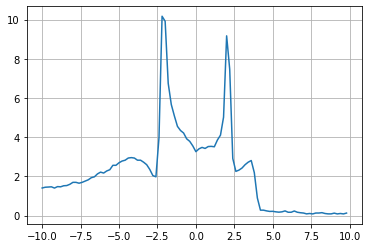

In [43]:
import time
teta=0.0###degree
tE=10.0## day
t0=0.0## day 
u0=0.1
q=  1.0
dis=1.0
rad= 0.02
tmin=float(-tE+t0)
tmax=float( tE+t0)
Num=100
a=[]
a.append(LensEq(q, dis, rad, tE, t0, u0, teta, tmin, tmax, Num))
t=time.time()
Binary(q, dis, rad, tE, t0, u0, teta, tmin, tmax, Num,a)
print(time.time()-t)

In [ ]:
teta=0.93###degree
tE=100.3## day
t0=7154.0## day 
u0=0.2
q=  0.5
dis=1.2
rad=0.05
tmin=float(-tE+t0)
tmax=float( tE+t0)
Num=100

Binary(q, dis, rad, tE, t0, u0, teta, tmin, tmax, Num)

In [ ]:
teta=0.0###degree
tE=10.0## day
t0=0.0## day 
u0=0.01
q=  1.0
dis=1.0
rad=0.03
tmin=float(-tE+t0)
tmax=float( tE+t0)
Num=100

Binary(q, dis, rad, tE, t0, u0, teta, tmin, tmax, Num)

In [ ]:
teta=0.93###degree
tE=100.3## day
t0=7154.0## day 
u0=0.2
q=  0.5
dis=1.2
rad=0.02
tmin=float(-tE+t0)
tmax=float( tE+t0)
Num=100

Binary(q, dis, rad, tE, t0, u0, teta, tmin, tmax, Num)

In [ ]:
teta=0.0###degree
tE=10.0## day
t0=0.0## day 
u0=0.05
q=  1.0
dis=1.0
rad=0.005
tmin=float(-tE+t0)
tmax=float( tE+t0)
Num=100
Binary(q, dis, rad, tE, t0, u0, teta, tmin, tmax, Num)

In [ ]:
teta=0.0###degree
tE=10.0## day
t0=0.0## day 
u0=0.1
q=  1.0
dis=1.0
rad=0.01
tmin=float(-tE+t0)
tmax=float( tE+t0)
Num=100

Binary(q, dis, rad, tE, t0, u0, teta, tmin, tmax, Num)

In [ ]:
teta=1.5707###degree
tE=20.0## day
t0=0## day 
u0=0.035
q=  0.8
dis=0.73
rad=0.01
tmin=float(-tE+t0)
tmax=float( tE+t0)
Num=100

Binary(q, dis, rad, tE, t0, u0, teta, tmin, tmax, Num)

In [ ]:
teta=0.05###degree
tE=100.3## day
t0=7154.0## day 
u0=0.015
q=  1.0
dis=1.0
rad=0.01
tmin=float(-tE+t0)
tmax=float( tE+t0)
Num=100

Binary(q, dis, rad, tE, t0, u0, teta, tmin, tmax, Num)

In [ ]:
xso=-2.0
yso=0.0
m1=m2=1
dis=1.0
rad=0.12
Binary(xso,yso,m1,m2,dis,rad)

In [ ]:
xso=-2.0
yso=0.0
m1=m2=1
dis=1.0
rad=0.1
Binary(xso,yso,m1,m2,dis,rad)

In [ ]:
xso=-2.5
yso=0.0
m1=1.0
m2=0.1
dis=1.0
rad=0.1
Binary(xso,yso,m1,m2,dis,rad)

In [ ]:
xso=-2.0
yso=0.0
m1=m2=1
dis=1.4
rad=0.01
Binary(xso,yso,m1,m2,dis,rad)

In [ ]:
import numpy as np
from scipy.interpolate import make_interp_spline
x=np.array(tim)
y=np.array(mag)
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 100)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
#plt.plot(tim,mag)
plt.show()

In [ ]:
tim=[-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
         -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
         -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
         -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
         -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
         -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
          0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
          2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
          4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
          6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
          8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
          9.8]
mag=[1.575,
  1.625,
  1.5916666666666666,
  1.6416666666666666,
  1.7416666666666667,
  1.8166666666666667,
  1.8333333333333333,
  1.8416666666666666,
  1.8333333333333333,
  1.9916666666666667,
  2.0,
  2.1083333333333334,
  2.075,
  2.1083333333333334,
  2.191666666666667,
  2.158333333333333,
  2.2416666666666667,
  2.2416666666666667,
  2.2666666666666666,
  2.4166666666666665,
  2.325,
  2.325,
  2.3833333333333333,
  2.25,
  2.4166666666666665,
  2.3333333333333335,
  2.216666666666667,
  2.15,
  3.6,
  6.875,
  7.591666666666667,
  8.133333333333333,
  6.491666666666666,
  5.758333333333334,
  5.125,
  4.75,
  4.341666666666667,
  4.25,
  3.95,
  3.9,
  3.716666666666667,
  3.5416666666666665,
  3.4916666666666667,
  3.3583333333333334,
  3.4,
  3.4166666666666665,
  3.466666666666667,
  3.4166666666666665,
  3.216666666666667,
  3.158333333333333,
  3.5,
  3.4833333333333334,
  3.5083333333333333,
  3.7583333333333333,
  3.85,
  3.9833333333333334,
  5.408333333333333,
  5.525,
  5.191666666666666,
  3.591666666666667,
  2.7416666666666667,
  1.725,
  1.6583333333333334,
  1.6416666666666666,
  1.625,
  1.6,
  1.675,
  1.7,
  1.7166666666666666,
  1.6916666666666667,
  1.7416666666666667,
  1.8333333333333333,
  1.775,
  1.8333333333333333,
  1.85,
  1.8083333333333333,
  1.7666666666666666,
  1.7666666666666666,
  1.725,
  1.75,
  1.675,
  1.6666666666666667,
  1.5833333333333333,
  1.6333333333333333,
  1.7083333333333333,
  1.6666666666666667,
  1.6416666666666666,
  1.6,
  1.4833333333333334,
  1.4833333333333334,
  1.5083333333333333,
  1.5333333333333334,
  1.4166666666666667,
  1.3333333333333333,
  1.4416666666666667,
  1.35,
  1.35,
  1.3,
  1.2666666666666666,
  1.3166666666666667]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
p=np.zeros((401,401))
for i in range(10,390):
    for j in range(10,390):
        p[i,j]=p[i,j]+1
plt.imshow(p)

In [ ]:
RE=1
nx=401
ny=401
xe=3*RE
ye=3*RE 
#dis=abs(L2X1-L1X1)
#q=m2/m1
#Coordinates of Source
xso=yso=0
xsize=2.*xe/(nx-1)
ysize=2.*ye/(ny-1)
ipos=int(round(xso/xsize))
jpos=int(round(-yso/ysize)) 
rpx=int(round(rad/ysize))    
def source(ny,rad,x1,y1):
    x,y=np.mgrid[0:ny,0:ny]
    r2=(x-x1-ny/2)**2+(y-y1-ny/2)**2
    s=np.exp(-r2*0.5/rad**2)
    return s/s.sum()
s=source(ny,rpx,jpos,ipos)
plt.imshow(s)

In [ ]:
jud=[]
for i in range(ny):
    for j in range(ny):
        if s[i,j]>=0.001:
            jud.append(s[i,j])

In [ ]:
sum(jud)